<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/WILLIAMS_PXT904_NUMERICAL_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical assignment 1

Work individually.

## Instructions for submission

To submit your work, save the notebook with the following filename:

`LAST_NAME_PXT904_NUMERICAL_ASSIGNMENT_1.ipynb`

# 1D Linear Elliptic Equation Solver

The goal of this assignment is to lead you through the steps required to write and test a one-dimensional finite difference numerical solver for an elliptic equation.

## Problem

Consider the one-dimensional, linear, elliptic equation for the function $u(x)$,

\begin{equation}
\nabla^2 u(x) = s(x), \tag{1}
\end{equation}

defined on the interval $x \in [0, 1]$, where the right-hand-side source function $s(x)$ is given by,

\begin{equation}
s(x) = -e^x  (-2 + 2x + 5x^2 + x^3). \tag{2}
\end{equation}

We further specify Dirichlet boundary conditions for our solution:

$$u(x=0) = 0,  \\
u(x=1) = 0. $$

In this assignment, you are asked to perform the following tasks:

  - Write a code to solve Equation $(1)$ for the solution $u(x)$ using $2^{nd}$-order finite differences.

  - Formulate the finite difference system as a matrix equation and solve it using the tri-diagonal method.

  - Perform a convergence test to verify $2^{nd}$-order convergence.


*Hint: only perform calulations on the interior of the computational domain, as described below.*

For the problem posed above, there is an analytic solution to Equation $(1)$:

\begin{equation}
u(x) = e^x x^2 ( 1-x )  \tag{3}
\end{equation}

We will use this analytic solution to check the accuracy of your code when performing the convergence tests.

# Setting up the computational domain

We discretise the $x$-axis ranging, from $x_{\rm{min}} = 0$ to $x_{\rm{max}} = 1$, into $N$ **grid cells**


\begin{equation}
\Delta x = \frac{x_{\rm{max}} - x_{\rm{min}}}{N}.
\end{equation}

From these $N$ **grid cells** we can choose the location of our **grid points**.
They can either be located at the centre of these cells (*cell-centred* grid) or on the vertices (*vertex-centred* grid). For this assignment, we suggest that you use a vertex-centred grid. The locations of our discrete points $x_i$ will depend on the type of grid we choose.

## Vertex-centred grid

For a vertex-centred grid we define $N+1$ **grid points** which are specified by the following formula:

\begin{equation}
x_i = x_{\rm{min}} + (i - 1)\Delta x \quad {\rm for \,\,\,\,}i = 1, ..., N+1.
\end{equation}

Be aware that in Python, arrays are indexed starting with $i=0$ rather than $i=1$.
## Computational Domain

The two grid points $x_1=x_\text{min}$ and $x_{N+1}=x_\text{max}$ lie on the outer boundaries of the grid cell domain, specifying the computational region of interest. These points are refered to as *boundary points*. We will use these boundary points to implement the boundary conditions, *but they will not be included as part of our computational domain*.

Strictly speaking, we will only be solving Equation $(1)$ on the interior of the grid cell region, for $x\in[x_2,x_N]=(x_\text{min},x_\text{max})$. As we have removed two grid points to construct the computational domain, its size is $M=N-1$. This information will be re-iterated below.

To summarise:
  - We specify $N$ grid cells for our computation, each of width $\Delta x$.
  - Using a vertex-centred grid, we denote $N+1$ grid points surrounding the grid cells.
  - Our solution is found over the computational domain of $M = N-1$ interior grid points.

# Finite Difference

The $2^{nd}$-order centred finite difference operator for a function $u(x)$ evaluated at a specific grid point $x_i$ is:

\begin{equation}
\nabla^2 u(x) |_{x=x_i} \approx \nabla^2 u_i = \frac{ u_{i+1} - 2u_{i} + u_{i-1} }{\Delta x^2} + \mathcal{O}(\Delta x^2), \tag{5}
\end{equation}

where we have introduced $u_i = u(x_i)$. This equation will give us the second derivative at each grid point $x_i$, and we may therefore express Equation $(1)$ as a system of linear equations running through the $i=1, ..., N+1$ grid points,

\begin{array}
\;u_{2} - 2u_{1} + u_{0}&= \Delta x^2 s_1,\\
u_{3} - 2u_{2} + u_{1} &= \Delta x^2 s_2,\\
\vdots &\vdots  \\
u_{N+1} - 2u_{N} + u_{N-1}  &= \Delta x^2 s_{N},\\
u_{N+2} - 2u_{N+1} + u_{N}  &= \Delta x^2 s_{N+1},
\end{array}

with $s_i = s(x_i)$. **Note** that naively, some of these equations include values of the solution outside of our established grid boundaries! (Specifically those corresponding to the source evaluated at the boundary points $i=1$ and $i=N+1$.) We handle this by restricting our domain of interest to only those vertex grid points within the strict interior of our domain of interest, which we call the *computational domain* $[x_2,x_{N}] \subset [x_\text{min},x_\text{max}]$, and we will specify "by hand" the behaviour of $u_1$ and $u_{N+1}$ at the boundaries using our **boundary conditions**. 

The series of equations strictly for $1<i<N+1$ may be written compactly as a vector equation,

\begin{equation}
\mathbf{A}\vec{u} = \vec{s},  \tag{4}
\end{equation}

where the components of the vectors $\vec{u}$ and $\vec{s}$ are just the elements $u_i$ and $s_i$, respectively,

$$\vec{u}=(u_2,u_3,...,u_N)^\text{T},\\ 
 \vec{s}=(s_2,s_3,...,s_N)^\text{T},$$

and the matrix $\mathbf{A}$ is of *tri-diagonal* form, meaning that the only non-zero components of $\mathbf{A}$ are the diagonal and immediately off-diagonal terms.

Solving for the solution $\vec{u}$ at every point is then equivalent to inverting the matrix $\mathbf{A}$,

\begin{equation}
\vec{u} = \mathbf{A}^{-1}\vec{s}.  \tag{5}
\end{equation}

Given the form of $\mathbf{A}$, we recommend using the *tri-diganonal method* to solve for its inverse. Directly inverting the $A$ matrix can be problematic if not handled properly, as the size of the matrix grows as $N^2$. The tri-diagonal method uses Gaussian elimination and back-substitution to efficiently solve our problem.

To summarise:

  - The $\mathbf{A}$ matrix is the finite difference discretisation of the $2^{nd}$-order differential oporator.

  - $\vec{u}$ is the solution vector and $\vec{s}$ is the right-hand-side source vector.

  - Use the tri-diagonal method that was discussed in lectures to solve for $u$ given Equation $(5)$.


# Boundary Conditions

As discussed above, we cannot evaluate the finite-difference derivative at all points in our domain $[x_\text{min},x_\text{max}]$, as this will require information about our function outside of this range of values. Instead, we restrict ourselves to the computational domain $[x_2,x_{N}]$. Let us consider the two equations for the points $u_2$ and $u_N$ at the boundaries of this computational domain,

\begin{array}
\;u_{3} - 2u_{2} + u_{1} &= \Delta x^2 s_2,\\
u_{N+1} - 2u_{N} + u_{N-1}  &= \Delta x^2 s_{N}.
\end{array}

These equations are well-defined, in the sense that they don't require information outside of our domain, e.g. $u_0$ or $u_{N+2}$, but as of yet we have no way to actually solve them since they depend on the boundary values of the solution, $u_1$ and $u_{N+1}$.

This is where we must implement the additional knowledge given to solve Equation $(1)$ in the form of the **boundary conditions**, specified earlier to be the Dirichlet boundary conditions,

$$u(x=x_\text{min}) = 0,  \\
u(x=x_\text{max}) = 0. $$

What do these conditions imply for the above equations? Use this knowledge to implement the Dirichlet boundary conditions into our finite difference scheme; depending on the type of boundary conditions applied, this may affect the first and last rows of the finite difference matrix $\mathbf{A}$!


# Your code Here

We have provided you a basic outline of the code to help you along with structuring your code. When you are ready to run and test each function, be sure to delete the code

```python
raise NotImplementedError
```
otherwise the function will produce an error.

# Import Packages

You should only need numpy and matplotlib

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Set the default font size to something a little bigger
matplotlib.rcParams.update({"font.size": 18})

# Analytic solution function

In [ ]:
def analytic_solution(x):
    """
    analytic solution i.e., equation 3

    Input:
        x: array. the computational domain
    
    Returns:
        array, the analytic solution
    """
    return (np.e**x) * (x**2) * (1-x)

# Source term function

In [ ]:
def RHS(x):
    """
    RHS is short for right hand side.
    function that evaluates the right hand side of equation 1 i.e. equation 2.
    This is the source term.

    Input:
        x: array. the computational domain
    
    Returns:
        array, the right hand side of equation 1.
    """
    return -np.e**x * (-2 + 2*x + 5*(x**2) + x**3)

# Computational domain function

In [ ]:
def get_vertex_centred_computational_domain(N_grid_cells, x_min=0., x_max=1.):
    """
    Inputs:
        N_grid_cells: int. Number of grid cells
        x_min: float (default:0.) start value of of domain
        x_max: float (default:1.) end value of of domain

    Returns:
        x: array, the computational domain

    Hint: remember that the computational domain doesn't actually include the
        points x_min and x_max in the vertex-centred grid. How many points lie
        in the computational domain compared to the number of grid cells or
        total grid points?
    """
    h = (x_max - x_min) / N_grid_cells
    x = np.arange(x_min + h, x_max, h)
    return x

## Solver Functions

In [ ]:
def gaussian_elimination(M, a, b, c, d):
    """
    function to perform Gaussian elimination and
    back substitution.

    given the equation Au = d
    solve for u assuming A is a tridiagonal matrix

    Inputs:
        M: int, number of grid points in computational domain
        a: array, lower diagonal of A
        b: array, main (middle) diagonal of A
        c: array, upper diagonal of A
        d: array, source term evaluated on the computational domain

    Returns
        u: array, the solution on the computational domain
    """
    # Gaussian elimination
    # Starts at 1, and loops over the computational domain M
    for i in range(1, M):
      # Weighting the arrays of the components of our tridiagonal matrix
      w = a[i-1] / b[i-1]
      b[i] = b[i] - w * c[i-1]
      d[i] = d[i] - w * d[i-1]

    # Back substitution
    u = d / b
    for i in range(M - 2, -1, -1):
      u[i] = (d[i]- c[i] * u[i + 1]) / b[i]

    return u

In [ ]:
def setup_tridiagonal_A_matrix(M, h):
    """
    This function sets up the tridiagonal matrix.

    Implement this by making an array for each of the elements
    of the tridiagonal matrix

    Be sure to specify the boundary conditions, which may affect
    the first and last rows of A

    Let:
        `a` be the lower diagonal
        `b` be the middle diagonal
        `c` be the upper diagonal

    Inputs:
        M: int, number of grid points in computational domain
        h: float, grid resolution (distance between points)

    Returns:
        a: array, lower diagonal of A
        b: array, main (middle) diagonal of A
        c: array, upper diagonal of A
    """
    # 1/h**2
    anti_h = 1/(h**2)
    # Lower diagonal
    a = np.ones(M) * anti_h
    # Main (middle) diagonal of A
    b = (np.ones(M) * -2) * anti_h
    # Upper diagonal 
    c = np.ones(M) * anti_h

    # Adding boundary conditions for a and c
    a[0] = 0
    c[-1] = 0

    return (a, b, c)

In [ ]:
def tridiagonal_solver(x, M, h):
    """
    This function calls the

        setup_tridiagonal_A_matrix() function
    
    evaluates the

        RHS() function

    feeds them into the 

        gaussian_elimination() function

    and finally returns the solution array `u`.

    Inputs:
        x: array, the computational domain
        M: int, number of grid points in computational domain
        h: float, grid resolution (distance between points)
    
    Returns:
        u: array, the solution on the computational domain
    """
    a, b, c = setup_tridiagonal_A_matrix(M, h)
    d = RHS(x)
    u = gaussian_elimination(M, a, b, c, d)
    return u

In [ ]:
def solver(N):
    """
    This is the main solver function.
    
    Given the number of grid cells (`N`) it will compute the numerical solution
    using the tridiagonal solver and will return the numerical solution (`u`)

    Hint: In this function simply compute everything needed to call the
    `tridiagonal_solver()` function.


    Input:
    N: int, number of grid cells

    Returns:
        u: array, the numerical solution on the computational domain
            Hint: even though there are `N` grid cells, the length
            of the `u` array will be `M = N - 1` because
            the vertex-centred grid will not actually contain the points
            x=0 and x=1 in the computational domain as these are
            fixed by the boundary conditions.
        
    """
    x = get_vertex_centred_computational_domain(N)
    h = x[1] - x[0]
    u = tridiagonal_solver(x, N-1, h)

    return u

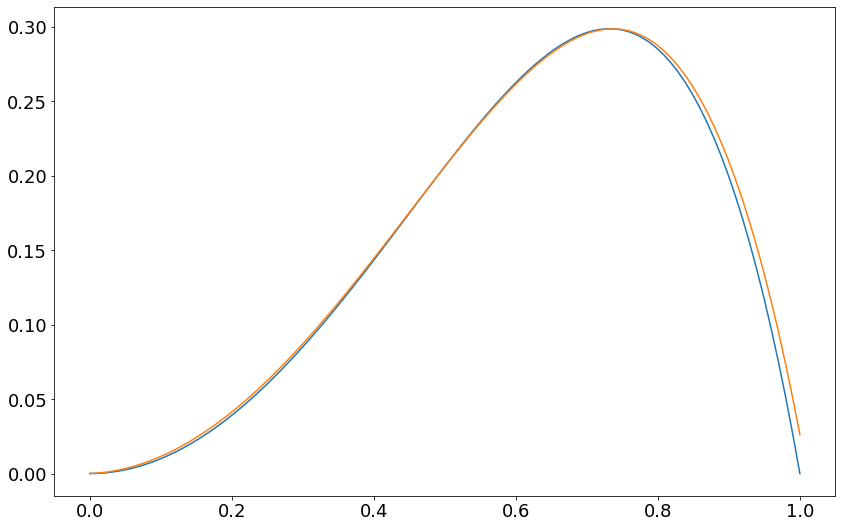

In [ ]:
# Defining our variables
N = 101 # number of grid cells

x = np.linspace(0, 1, 100)

# Calling the functions to solve our analytical solution
u_analytical = analytic_solution(x)

# Calling the functions to solve our numerical solution
u_numerical  = solver(N)

# Plotting our analytical and numerical solutions to the elliptic equation
plt.figure(figsize = (14, 9))
# Analytical solution
plt.plot(x, u_analytical)
# Numerical solution
plt.plot(x, u_numerical);